In [748]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_circles


In [749]:
df = pd.read_csv("Heart Attack.csv")

In [750]:
df['class'] = df['class'].map({'negative': 0, 'positive': 1})

In [751]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [752]:
# df['class'] = df['class'].map({'negative': 0, 'positive': 1})

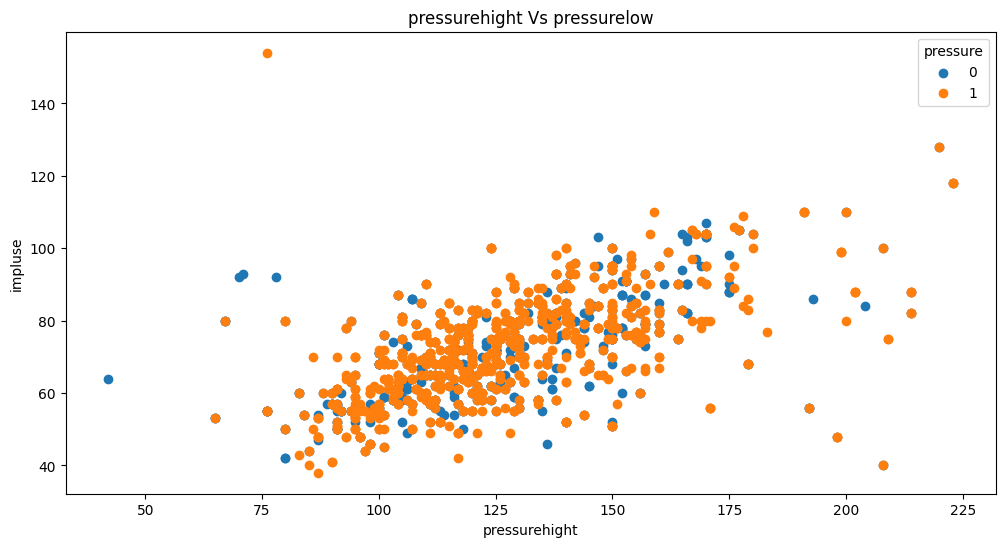

In [753]:
plt.figure(figsize=(12,6))
for pressure, pressure_data in df.groupby('class'):
    plt.scatter(pressure_data['pressurehight'],pressure_data['pressurelow'],label=pressure)

plt.xlabel('pressurehight')
plt.ylabel('impluse')
plt.legend(title="pressure")
plt.title('pressurehight Vs pressurelow')
plt.show()

In [754]:
X = df.drop("class", axis=1)
y = df["class"]

In [755]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [756]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Use SVM model


In [757]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [758]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [759]:
model = SVC(kernel='linear')
model.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [760]:
# plt.scatter(X_test[:, 0], X_test[:, 3], c=y_pred, cmap='winter', s=100, edgecolor='k', label='Predicted')
# plt.xlabel('Age')
# plt.ylabel('Pressure Hight')
# plt.title('Predicted Scatter Plot')
# plt.legend()
# plt.show()

In [761]:
# print("Accuracy:", accuracy_score(y_test, y_pred))

In [762]:
# zero_one_colourmap = ListedColormap(('blue', 'red'))
# def plot_decision_boundary(X, y, clf):
#     X_set, y_set = X, y
#     X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
#                                  stop = X_set[:, 0].max() + 1,
#                                  step = 0.01),
#                        np.arange(start = X_set[:, 1].min() - 1,
#                                  stop = X_set[:, 1].max() + 1,
#                                  step = 0.01))
  
#     plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
#                                              X2.ravel()]).T).reshape(X1.shape),
#                alpha = 0.75,
#                cmap = zero_one_colourmap)
#     plt.xlim(X1.min(), X1.max())
#     plt.ylim(X2.min(), X2.max())
#     for i, j in enumerate(np.unique(y_set)):
#         plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = (zero_one_colourmap)(i), label = j)
#     plt.title('SVM Decision Boundary')
#     plt.xlabel('X1')
#     plt.ylabel('X2')
#     plt.legend()
#     return plt.show()

In [763]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                    stop = X_set[:, 0].max() + 1,
                                    step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1,
                                    stop = X_set[:, 1].max() + 1,
                                    step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                                X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

C:\Users\jay\AppData\Local\Temp\ipykernel_4692\2015018645.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


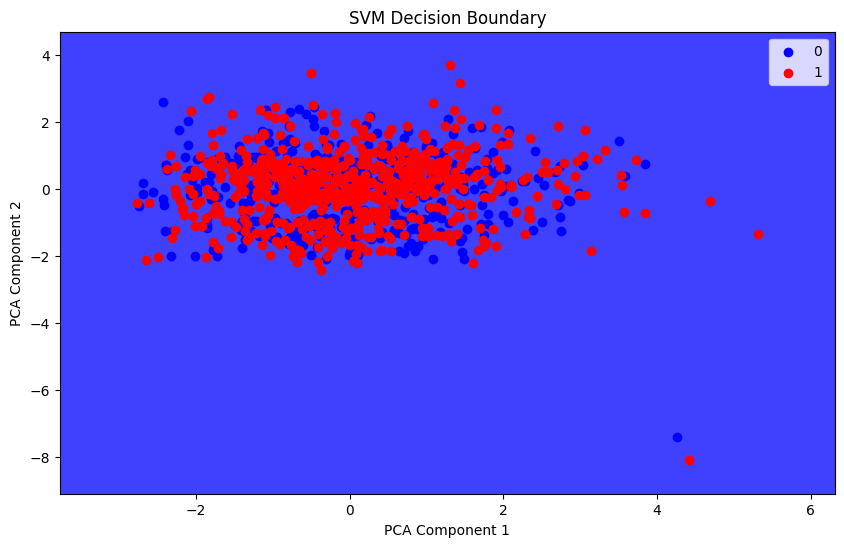

In [764]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train_pca, y_train, model)

In [765]:
def plot_3d_plot(X, y, clf):
    # Create a grid of points for plotting decision boundaries
    x1_range = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    x2_range = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # Predict using the SVC model on the meshgrid points
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)

    # Set up the 3D plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter the original data points
    ax.scatter(X[:, 0], X[:, 1], np.exp(-(X ** 2).sum(axis=1)), c=y, s=100, cmap='bwr', edgecolor='k', label='Data Points')
    
    # Plot the decision boundary
    ax.contourf(X1, X2, Z, alpha=0.3, cmap='coolwarm', zdir='z', offset=-0.2)  # Set offset to position the contour below the data points
    
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('R Value')
    plt.title('Decision Boundary of SVC Model with PCA in 3D')
    plt.legend(['Negative', 'Positive'])
    plt.grid(True)
    plt.show()

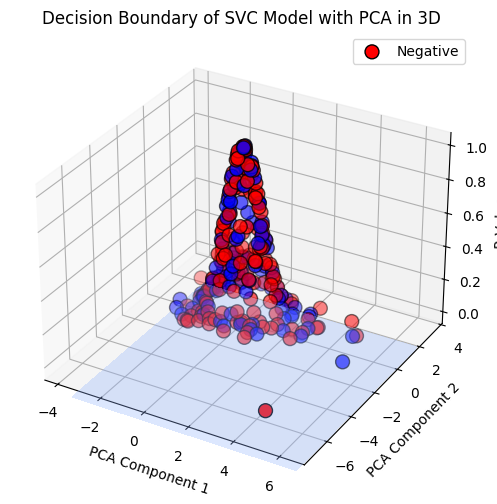

In [766]:
plot_3d_plot(X_test_pca, y_test, model)

In [767]:
rbf_classifier = SVC(kernel='linear')
rbf_classifier.fit(X_train,y_train)
y_pred = rbf_classifier.predict(X_test)

In [768]:
accuracy_score(y_test,y_pred)

0.7992424242424242

C:\Users\jay\AppData\Local\Temp\ipykernel_4692\2015018645.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


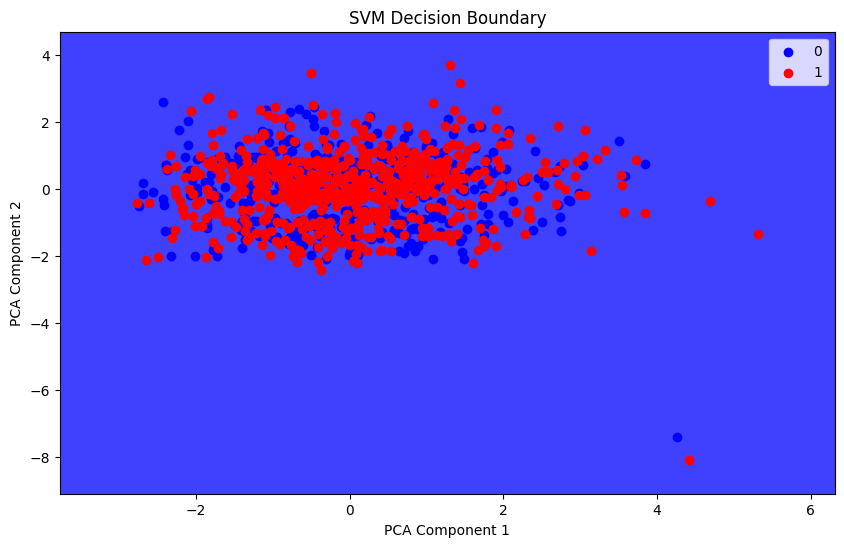

In [769]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train_pca, y_train, model)